<a href="https://colab.research.google.com/github/Bishalroybd/Neural-net/blob/main/YOLO_SEG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0


In [ ]:
import zipfile
import os

# 1. Create the 'APTOS' folder if it doesn't exist
aptos_folder = '/content/APTOS'  # Define the path for the new folder
os.makedirs(aptos_folder, exist_ok=True)  # Create the folder

# 2. Define the path to the zip file
zip_file_path = '/content/diabetic-retinopathy-224x224-gaussian-filtered.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the 'APTOS' folder
    zip_ref.extractall(aptos_folder)

print(f"Files extracted to: {aptos_folder}")

Files extracted to: /content/APTOS


In [ ]:
! kaggle datasets download aaryapatel98/indian-diabetic-retinopathy-image-dataset

Dataset URL: https://www.kaggle.com/datasets/aaryapatel98/indian-diabetic-retinopathy-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
import zipfile
import os

# 1. Create the IDRID folder if it doesn't exist
idrid_folder = '/content/IDRID'
os.makedirs(idrid_folder, exist_ok=True)

# 2. Define the path to the zip file
zip_file_path = '/content/indian-diabetic-retinopathy-image-dataset.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the IDRID folder
    zip_ref.extractall(idrid_folder)

print(f"Files extracted to: {idrid_folder}")

Files extracted to: /content/IDRID


In [ ]:
# IDRID
import os

IDRID_dir = "/content/IDRID"

print("Files in IDRID directory:", os.listdir(IDRID_dir))

Files in IDRID directory: ['B.%20Disease%20Grading', 'A.%20Segmentation', 'C.%20Localization']


In [ ]:
! kaggle datasets download realhaadkhan/idrid-yolo

Dataset URL: https://www.kaggle.com/datasets/realhaadkhan/idrid-yolo
License(s): apache-2.0


In [ ]:
import zipfile
import os

# 1. Create the IDRID folder if it doesn't exist
idrid_folder = '/content/idrid-yolo'
os.makedirs(idrid_folder, exist_ok=True)

# 2. Define the path to the zip file
zip_file_path = '/content/idrid-yolo.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the IDRID folder
    zip_ref.extractall(idrid_folder)

print(f"Files extracted to: {idrid_folder}")

Files extracted to: /content/idrid-yolo


In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import glob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import torch

print("Torch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("CUDA Device Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected by PyTorch.")

#If CUDA Available is False, run the below snippet and restart

Torch Version: 2.6.0+cu124
CUDA Available: True
CUDA Device Count: 1
CUDA Device Name: Tesla T4


In [ ]:
# Define dataset path
dataset_path = "/content/idrid-yolo"  # <- Update this if needed

# Define image and label paths
train_images_path = os.path.join(dataset_path, "images/train")
train_labels_path = os.path.join(dataset_path, "labels/train")
val_images_path = os.path.join(dataset_path, "images/val")
val_labels_path = os.path.join(dataset_path, "labels/val")


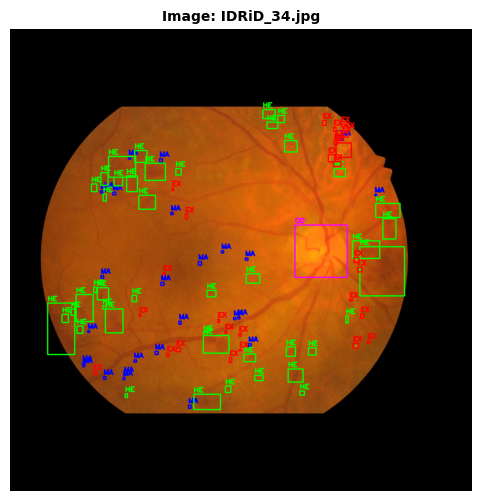

In [ ]:
# Define class names and colors
CLASS_NAMES = ["MA", "HE", "EX", "SE", "OD"]
CLASS_COLORS = {
    "MA": (0, 0, 255),   # Red
    "HE": (0, 255, 0),   # Green
    "EX": (255, 0, 0),   # Blue
    "SE": (255, 255, 0), # Cyan
    "OD": (255, 0, 255)  # Orange
}

def plot_sample_image(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image filename
    image_name = os.path.basename(image_path)

    # Read YOLO annotation file
    with open(label_path, "r") as f:
        boxes = f.readlines()

    h, w, _ = image.shape

    # Draw bounding boxes with class labels
    for box in boxes:
        class_id, x, y, bw, bh = map(float, box.strip().split())
        class_id = int(class_id)
        class_name = CLASS_NAMES[class_id]
        color = CLASS_COLORS[class_name]

        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Put class label
        cv2.putText(image, class_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display image with title
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Image: {image_name}", fontsize=10, fontweight="bold")
    plt.axis("off")
    plt.show()

# Show one sample image
sample_image_path = glob.glob(os.path.join(train_images_path, "*.jpg"))[15]
sample_label_path = os.path.join(train_labels_path, os.path.basename(sample_image_path).replace(".jpg", ".txt"))
plot_sample_image(sample_image_path, sample_label_path)

In [ ]:
# Load YOLOv8 model (pretrained on COCO dataset)
model = YOLO("yolov8n.pt")  # 'n' stands for nano (smallest version)

100%|██████████| 6.25M/6.25M [00:00<00:00, 86.5MB/s]


In [ ]:
model.train(
    data=os.path.join(dataset_path, "dataset.yaml"),
    epochs=100,
    imgsz=1024,
    batch=8,
    workers=2,
    device="auto"  # Automatically uses GPU if available
)

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:auto (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/idrid-yolo/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=auto, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 19.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.5MB/s]


AMP: checks passed ✅


train: Scanning /content/idrid-yolo/labels/train... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 392.40it/s]

train: New cache created: /content/idrid-yolo/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/idrid-yolo/labels/val... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<00:00, 196.44it/s]

val: New cache created: /content/idrid-yolo/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.53G      2.744       4.71      1.524        980       1024: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         27       3194   6.27e-05   0.000103   3.95e-05   3.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.3G      2.788      4.555      1.335       1194       1024: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         27       3194   0.000378   0.000515   0.000687   0.000509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.3G      2.779       4.05      1.227        930       1024: 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         27       3194     0.0543      0.137     0.0894     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.3G      2.695      3.457      1.164       1213       1024: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         27       3194     0.0222      0.218      0.156     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.3G      2.663      2.911      1.168        445       1024: 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         27       3194     0.0331      0.261      0.186     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.4G      2.626       2.78       1.16       1120       1024: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         27       3194     0.0356      0.309      0.213      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.4G      2.591      2.545      1.131       1361       1024: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         27       3194     0.0393      0.328      0.222      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.4G      2.626      2.492      1.108       1484       1024: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         27       3194      0.705      0.141      0.227      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.4G      2.552      2.354      1.126        646       1024: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         27       3194      0.699      0.142      0.225      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.4G      2.475      2.349      1.103        410       1024: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         27       3194      0.717      0.135      0.223       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.4G      2.472      2.308      1.114        676       1024: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         27       3194      0.555      0.191      0.239      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.5G      2.511      2.307      1.103        813       1024: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         27       3194      0.542      0.224      0.259      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.5G      2.419      2.175      1.105        474       1024: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         27       3194      0.605      0.253      0.284      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.5G      2.456      2.116      1.099        676       1024: 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         27       3194      0.605      0.253      0.284      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.6G      2.458      2.117      1.112        906       1024: 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         27       3194      0.611      0.277      0.314      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.6G      2.464      2.132      1.121       1113       1024: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         27       3194      0.707      0.299      0.353      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.6G      2.463      2.037      1.117        650       1024: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         27       3194      0.591      0.326      0.357      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.6G      2.426      2.015      1.107        692       1024: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         27       3194      0.586      0.357      0.366      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.7G      2.407      2.028      1.115        774       1024: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         27       3194      0.566       0.37      0.364      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.7G       2.42      1.928      1.105        772       1024: 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         27       3194       0.59      0.389      0.369      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.7G      2.456      1.998      1.109       1450       1024: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         27       3194      0.623      0.389      0.386      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.21G      2.477      1.977      1.078       1055       1024: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         27       3194      0.623      0.389      0.386      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.22G      2.474      1.957      1.086        755       1024: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         27       3194      0.522      0.403      0.383      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.24G      2.363      1.925      1.076        712       1024: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         27       3194      0.529      0.409      0.383      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.26G      2.407      1.978      1.091        554       1024: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         27       3194      0.508      0.419      0.392      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.27G      2.359       1.92      1.074        569       1024: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         27       3194      0.499      0.404      0.394      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.29G      2.413      1.941      1.086       1022       1024: 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         27       3194      0.448      0.414      0.382      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.31G      2.329      1.857      1.066        551       1024: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         27       3194      0.437       0.41      0.375      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.32G      2.334      1.883      1.073       1715       1024: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         27       3194      0.479      0.411      0.383      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.34G      2.421      1.856      1.092       1214       1024: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         27       3194      0.479      0.411      0.383      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.36G      2.338      1.905       1.07        168       1024: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         27       3194      0.497      0.424      0.402      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.38G       2.36      1.818      1.077       1214       1024: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         27       3194      0.481      0.427      0.402      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.39G      2.337      1.827      1.067       1165       1024: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         27       3194      0.452      0.427      0.396       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.41G      2.378      1.845       1.08        907       1024: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         27       3194      0.462      0.438      0.401      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.43G      2.322      1.786      1.038        817       1024: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         27       3194      0.451      0.451      0.405       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.45G      2.314      1.828      1.059        582       1024: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         27       3194      0.462      0.449      0.407      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.46G      2.326      1.881      1.083       1323       1024: 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         27       3194      0.474      0.428      0.406      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.48G      2.324       1.84      1.094       1012       1024: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         27       3194      0.474      0.428      0.406      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       8.5G      2.341      1.737      1.058        579       1024: 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         27       3194       0.47      0.426      0.405      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.51G      2.301      1.778      1.064        664       1024: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         27       3194      0.442      0.431      0.404      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.53G      2.334      1.816      1.072        508       1024: 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         27       3194      0.443      0.432      0.401      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.55G      2.278      1.775      1.054        749       1024: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         27       3194      0.448      0.445      0.407      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.57G      2.303      1.729      1.065       1117       1024: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         27       3194      0.503      0.417      0.411      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.58G      2.268      1.755      1.055       1207       1024: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         27       3194      0.477      0.431      0.419      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       8.6G      2.285      1.723       1.08       1148       1024: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         27       3194      0.505      0.431      0.434      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.62G       2.26      1.708      1.055        560       1024: 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         27       3194      0.505      0.431      0.434      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.63G      2.268      1.693      1.036        851       1024: 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         27       3194       0.49      0.433      0.432      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.65G      2.221      1.673      1.031       1259       1024: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         27       3194      0.482      0.459      0.439      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.67G       2.31       1.69      1.045       1689       1024: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         27       3194       0.47      0.476      0.442      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.69G      2.314      1.647      1.033       1746       1024: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         27       3194      0.503      0.469      0.457      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       8.7G      2.206      1.678      1.077       1193       1024: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         27       3194      0.503      0.459      0.461      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.72G      2.258      1.662      1.052        442       1024: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         27       3194      0.493      0.472      0.453      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.74G      2.254      1.618      1.071       1083       1024: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         27       3194      0.493      0.468      0.459      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.75G       2.27      1.609       1.07        707       1024: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         27       3194      0.493      0.468      0.459      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.77G      2.231      1.662      1.046        801       1024: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         27       3194      0.516      0.468      0.459      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.79G      2.226      1.632       1.04        642       1024: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         27       3194      0.506      0.462      0.448      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.81G      2.261      1.689      1.041        597       1024: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         27       3194      0.498      0.469       0.45      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.82G      2.207      1.616      1.035        745       1024: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         27       3194      0.498      0.465       0.45      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.84G      2.251      1.652      1.033       1200       1024: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         27       3194      0.513      0.473      0.459      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.86G      2.235      1.638      1.049        803       1024: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         27       3194      0.519      0.467      0.456      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.88G       2.19      1.553      1.051       1611       1024: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         27       3194      0.509      0.476      0.455      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.89G       2.18      1.626      1.031        592       1024: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         27       3194      0.509      0.476      0.455      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.2G      2.197       1.58      1.027        738       1024: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         27       3194      0.489      0.498      0.461      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.2G      2.169      1.566       1.03        838       1024: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         27       3194      0.501      0.486      0.455      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.3G      2.196      1.584      1.029        754       1024: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         27       3194      0.485      0.479      0.456      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.3G      2.261      1.548       1.02       1660       1024: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         27       3194      0.517      0.479      0.463      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.3G      2.218       1.54       1.03       1128       1024: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         27       3194      0.535      0.482      0.472      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.3G      2.176      1.558      1.028       1091       1024: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         27       3194      0.547      0.476      0.476      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.3G      2.232      1.654      1.067        867       1024: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         27       3194      0.556       0.47      0.475      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.3G      2.272      1.565      1.038        963       1024: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         27       3194      0.556       0.47      0.475      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.4G      2.166      1.507      1.039       1356       1024: 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         27       3194      0.554      0.459       0.47      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.4G      2.182      1.576      1.049        586       1024: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         27       3194      0.544      0.468      0.466      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.4G      2.186      1.572      1.033        788       1024: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         27       3194      0.539      0.471      0.467      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.4G      2.126      1.495      1.036       1099       1024: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         27       3194      0.529      0.475      0.459      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.4G      2.125      1.583      1.024        822       1024: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         27       3194      0.534      0.462      0.459      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.5G       2.12      1.479      1.024       1236       1024: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         27       3194      0.525      0.478      0.463      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.5G       2.14      1.503      1.003       1605       1024: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         27       3194      0.528      0.493      0.473      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.5G      2.154      1.531      1.008        830       1024: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         27       3194      0.528      0.493      0.473      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.5G      2.157       1.51      1.021        732       1024: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         27       3194      0.513      0.484      0.473      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.5G      2.139      1.548      1.035        902       1024: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         27       3194      0.497        0.5      0.472      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.5G      2.106      1.482      1.031        599       1024: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         27       3194      0.512      0.498      0.472      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.6G      2.174       1.51      1.027       1015       1024: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         27       3194      0.509      0.494      0.474      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.6G      2.152      1.482       1.02       1926       1024: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         27       3194      0.516      0.498      0.473      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.6G      2.156      1.471      1.016       1229       1024: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         27       3194      0.516      0.496      0.472      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.6G      2.127      1.507      1.017       1057       1024: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         27       3194      0.532      0.494      0.477      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.6G      2.135      1.474      1.012        471       1024: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         27       3194      0.532      0.494      0.477      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.6G      2.096      1.468      1.026        781       1024: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         27       3194      0.529      0.482      0.477        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.7G      2.068      1.486      1.015        903       1024: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         27       3194      0.527       0.49      0.474        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.7G      2.131      1.451      1.021       1124       1024: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         27       3194      0.518      0.486      0.474      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.7G      2.088      1.468       1.01        698       1024: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         27       3194      0.519      0.489      0.479      0.301


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.7G       2.14      1.547      1.021        630       1024: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         27       3194      0.526      0.493      0.478      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.7G      2.114      1.522      1.009        769       1024: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         27       3194       0.53      0.499      0.478      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.7G      2.091      1.492      1.013        471       1024: 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         27       3194      0.515      0.494      0.477      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.8G      2.062      1.482      1.024        761       1024: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         27       3194      0.515      0.494      0.477      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.8G      2.128      1.464      1.019        771       1024: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         27       3194       0.53      0.489      0.479        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.8G      2.085      1.488      1.031        510       1024: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         27       3194       0.54      0.481      0.482      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.8G       2.04      1.459      1.019        644       1024: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         27       3194      0.535      0.484      0.478      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.8G       2.04      1.443      1.011        390       1024: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         27       3194      0.542      0.486      0.481      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.8G      2.066      1.455       1.01        789       1024: 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         27       3194      0.544      0.484       0.48      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.9G      2.073      1.525      1.019        744       1024: 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         27       3194       0.54      0.485      0.481      0.303



100 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:auto (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


                   all         27       3194       0.54      0.485      0.481      0.304
                    MA         27        662       0.45     0.0906      0.165     0.0569
                    HE         27        526      0.376      0.386      0.324      0.123
                    EX         27       1941       0.44      0.345      0.324       0.12
                    SE         14         38      0.464      0.605      0.598      0.321
                    OD         27         27      0.969          1      0.995      0.898
Speed: 0.5ms preprocess, 5.2ms inference, 0.0ms loss, 16.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f81ff494ed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run evaluation (YOLO will look for val images in your dataset.yaml)
metrics = model.val()


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/idrid-yolo/labels/val.cache... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]


                   all         27       3194      0.547      0.484      0.481      0.303
                    MA         27        662      0.451     0.0861      0.165     0.0567
                    HE         27        526      0.389      0.378      0.324      0.125
                    EX         27       1941      0.453      0.345      0.327       0.12
                    SE         14         38      0.471       0.61      0.596       0.32
                    OD         27         27      0.969          1      0.995      0.892
Speed: 17.3ms preprocess, 13.4ms inference, 0.0ms loss, 13.0ms postprocess per image
Results saved to runs/detect/val


In [ ]:
from ultralytics import YOLO

models = YOLO("/content/runs/detect/train/weights/best.pt") # build a new model from YAML

results = models("/content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg", save=True)


image 1/1 /content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg: 704x1024 1 MA, 14 HEs, 97 EXs, 1 OD, 56.4ms
Speed: 11.3ms preprocess, 56.4ms inference, 2.4ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict



image 1/1 /content/idrid-yolo/images/train/IDRiD_34.jpg: 1024x1024 2 MAs, 29 HEs, 11 EXs, 1 SE, 1 OD, 13.2ms
Speed: 5.2ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict2


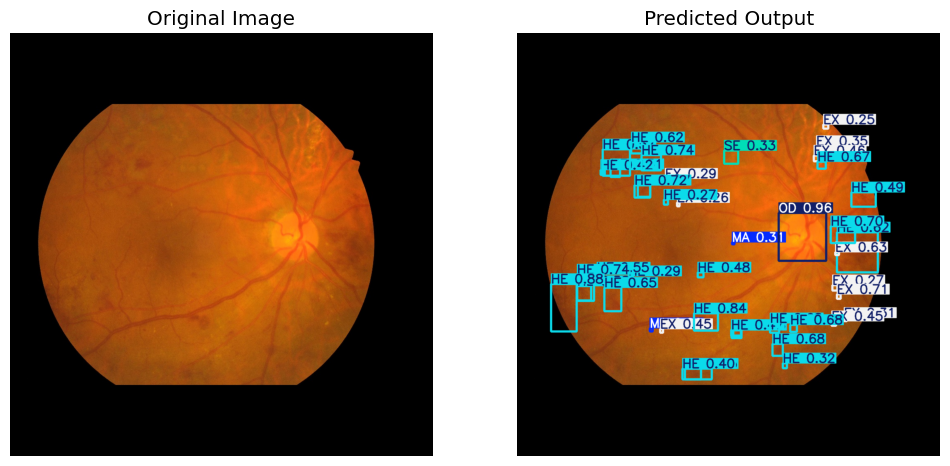

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Load YOLOv8 model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Image path
image_path = "/content/idrid-yolo/images/train/IDRiD_34.jpg"

# Run inference (prediction)
results = model(image_path, save=True)

# Load the original image
original_image = Image.open(image_path)

# Get the predicted image as a NumPy array (with bounding boxes)
predicted_img = results[0].plot()

# Convert BGR to RGB (Matplotlib expects RGB format)
predicted_img = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)

# Display the original and predicted images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(predicted_img)  # Now correctly formatted in RGB
plt.axis("off")
plt.title("Predicted Output")

plt.show()